In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

import pickle




sns.set()

#set the plot size to 14" x 4"
plt.rcParams['figure.figsize'] = (18,5)


# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [4]:
df = pd.read_csv("/home/administrator/Used_Car_Price_Modeling/practical_application_II_starter/data/vehicles.csv")

In [5]:
df.sample(50).head(2)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
346225,7303946875,columbia,28900,2005.0,chevrolet,corvette,excellent,8 cylinders,gas,21000.0,clean,automatic,NaN,NaN,NaN,convertible,red,sc
199411,7310275091,flint,9000,2013.0,nissan,altima,excellent,6 cylinders,gas,126304.0,clean,automatic,1N4BL3AP2DC165619,fwd,mid-size,sedan,black,mi


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [7]:
df.isna().mean()

id              0.000000
region          0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
VIN             0.377254
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
state           0.000000
dtype: float64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [197]:
df.condition.value_counts()

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

In [198]:
df.cylinders.value_counts()

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

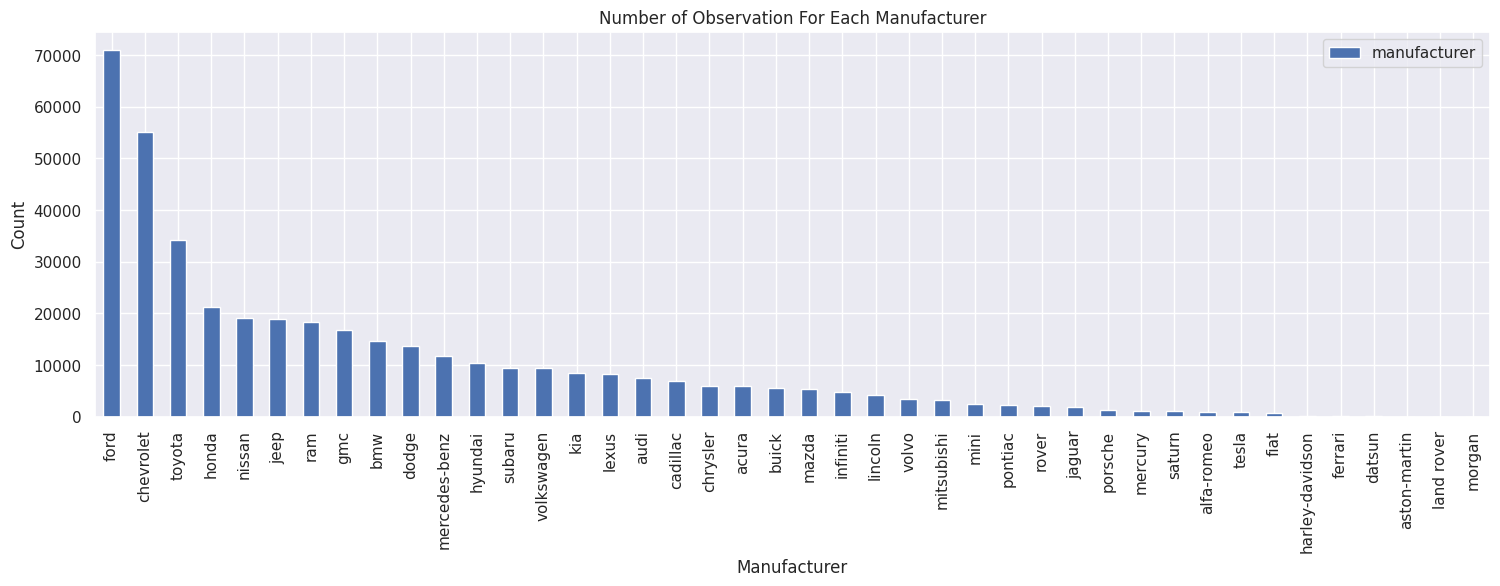

In [200]:
df.manufacturer.value_counts().reset_index().sort_values(by="manufacturer", ascending=False).plot(kind="bar", x="index", y="manufacturer")
plt.title("Number of Observation For Each Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.show()

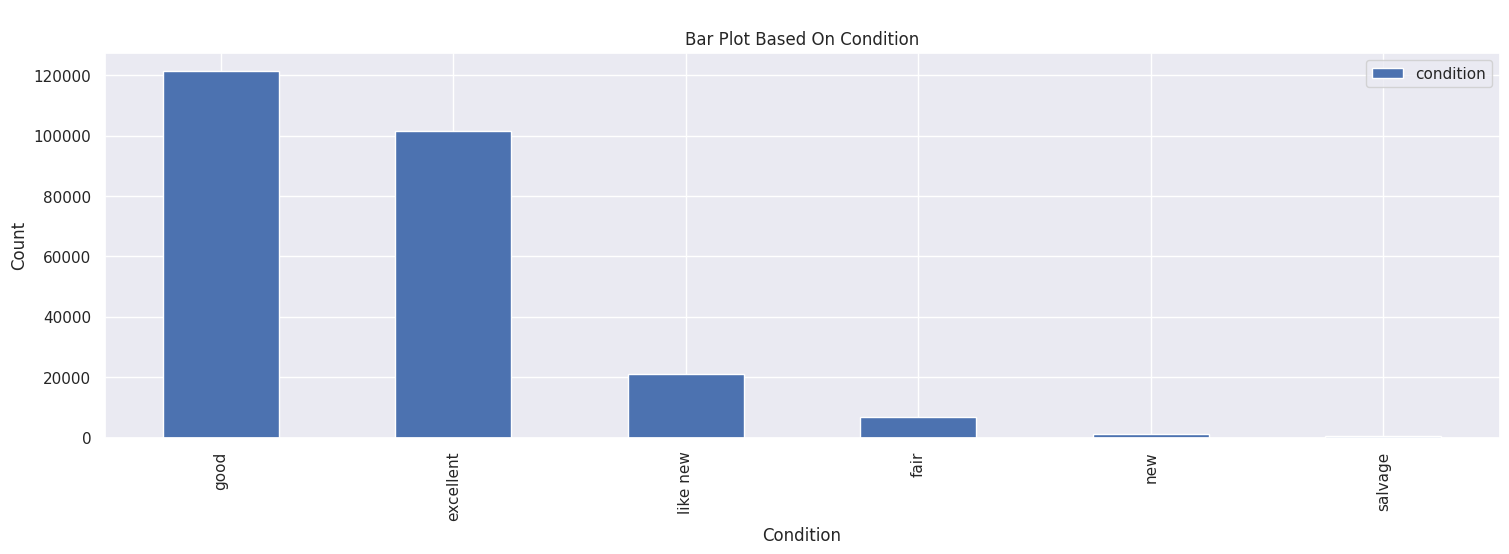

In [201]:
df.condition.value_counts().reset_index().plot(kind="bar", x="index", y="condition");
plt.title("\nBar Plot Based On Condition")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.show()

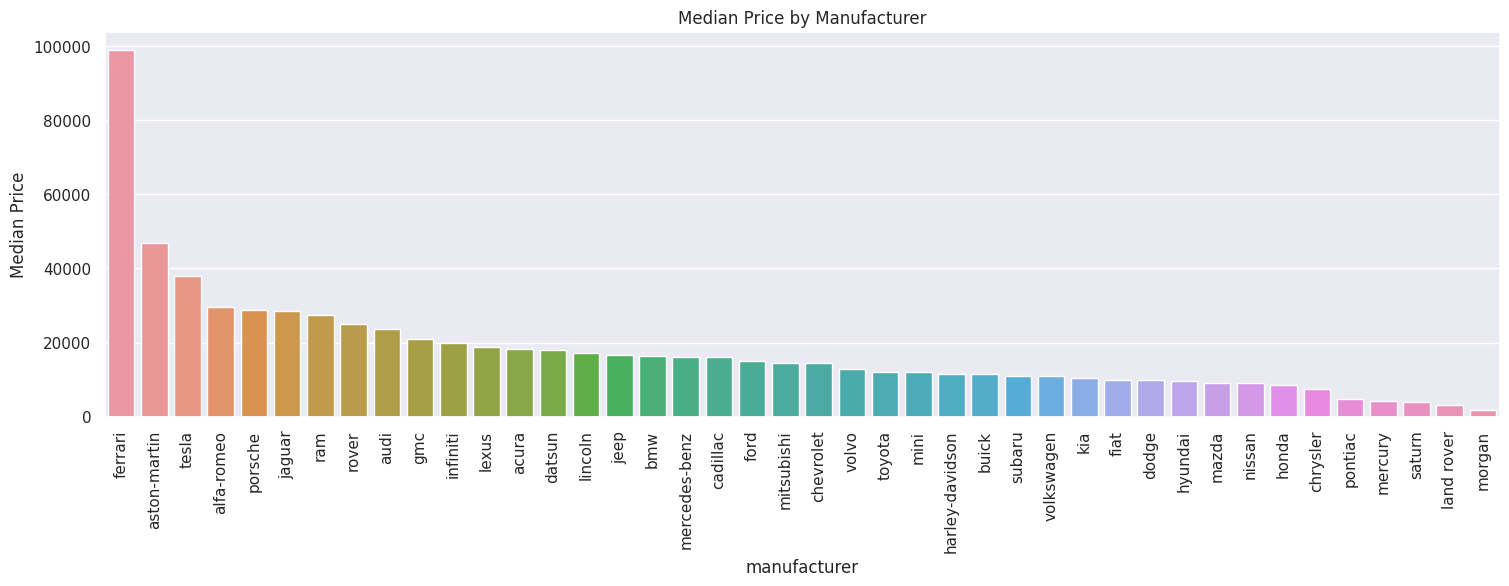

In [11]:
avg_price_by_man = df.groupby('manufacturer')['price'].median().reset_index().sort_values(by="price", ascending=False)

sns.barplot(x='manufacturer', y='price', data=avg_price_by_man)
plt.ylabel('Median Price')
plt.title('Median Price by Manufacturer')
plt.xticks(rotation=90) 
plt.show()

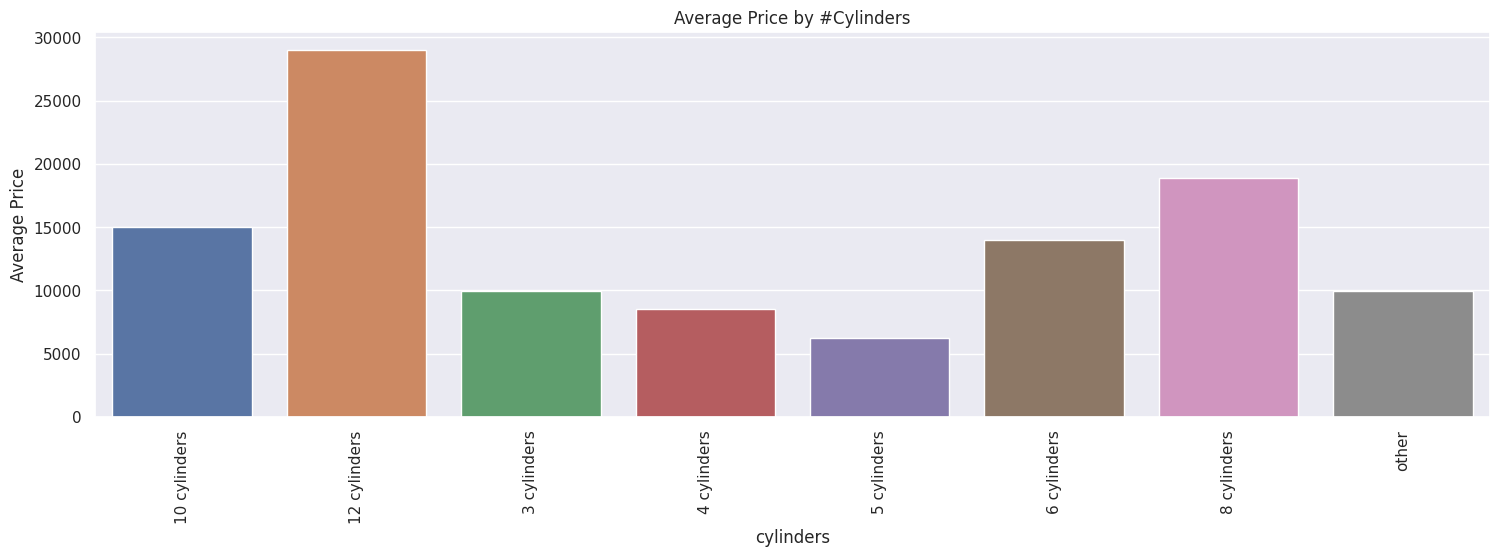

In [203]:
avg_price_by_cyl = df.groupby('cylinders')['price'].median().reset_index()

sns.barplot(x='cylinders', y='price', data=avg_price_by_cyl)
plt.ylabel('Average Price')
plt.title('Average Price by #Cylinders')
plt.xticks(rotation=90) 
plt.show()

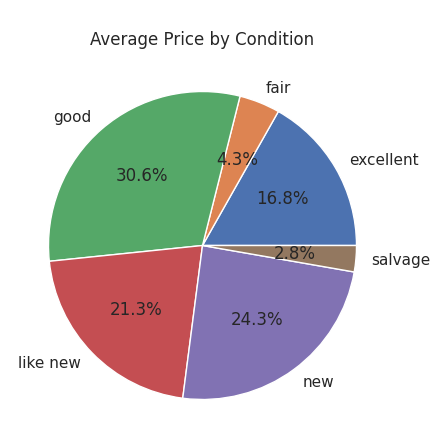

In [205]:
avg_price_by_cond = df.groupby('condition')['price'].median()

plt.pie(avg_price_by_cond, labels = avg_price_by_cond.index, autopct='%1.1f%%')
plt.title('\nAverage Price by Condition')
plt.show()

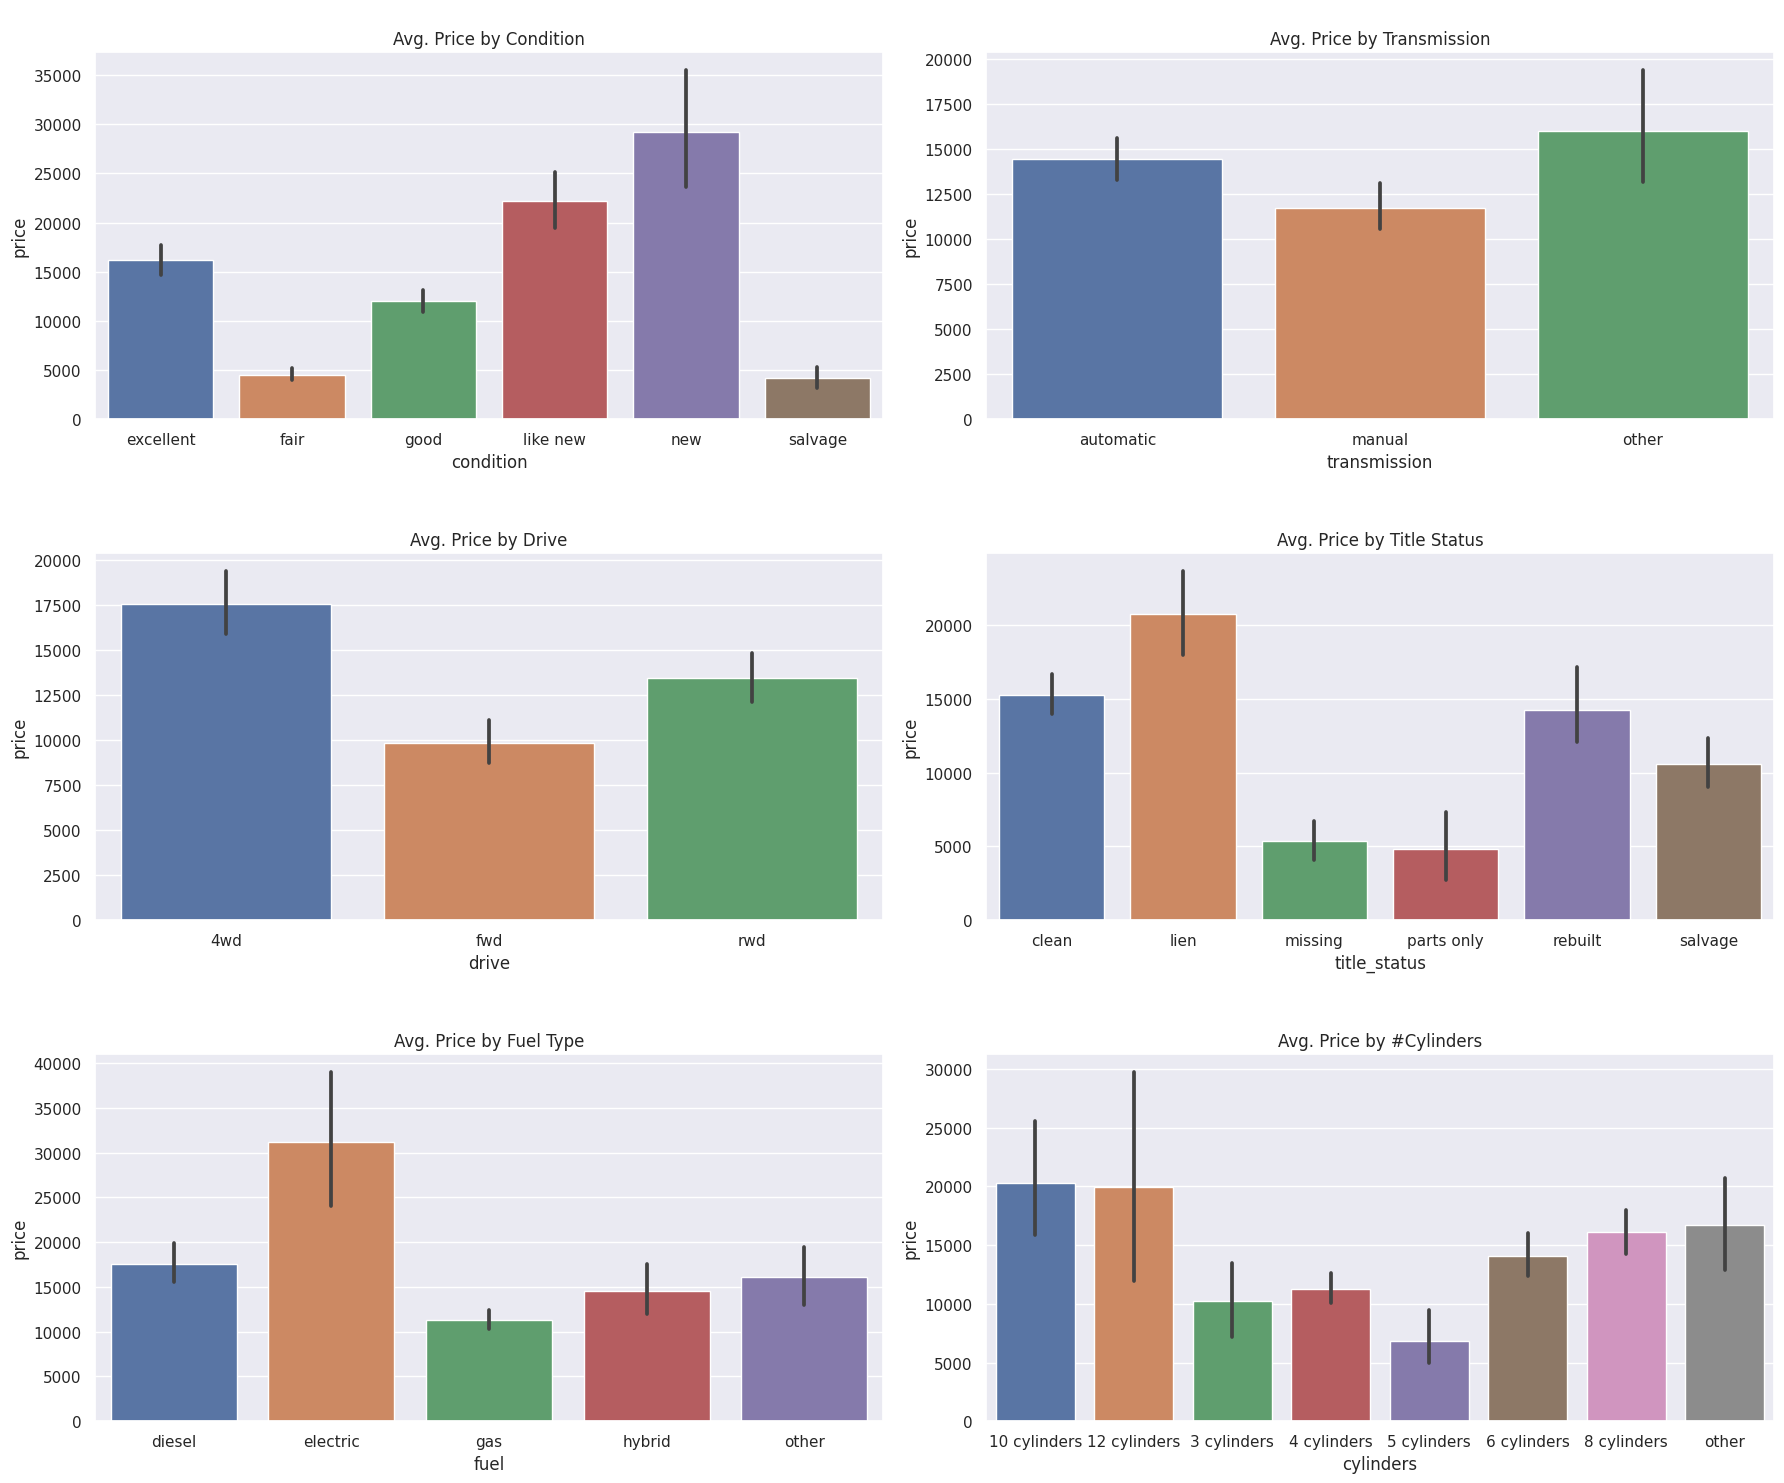

In [130]:
total_price = df.groupby(['condition', "transmission", "drive", "title_status", "fuel", "cylinders"])['price'].median().reset_index()



fig, axs = plt.subplots(3, 2, figsize=(18, 15))

sns.barplot(x='condition', y='price', data=total_price, ax=axs[0, 0])
axs[0, 0].set_title('\nAvg. Price by Condition')

sns.barplot(x='transmission', y='price', data=total_price, ax=axs[0, 1])
axs[0, 1].set_title('\nAvg. Price by Transmission')


sns.barplot(x='drive', y='price', data=total_price, ax=axs[1, 0])
axs[1, 0].set_title('\n\nAvg. Price by Drive')

sns.barplot(x='title_status', y='price', data=total_price, ax=axs[1, 1])
axs[1, 1].set_title('\n\nAvg. Price by Title Status')

sns.barplot(x='fuel', y='price', data=total_price, ax=axs[2, 0])
axs[2, 0].set_title('\n\nAvg. Price by Fuel Type')

sns.barplot(x='cylinders', y='price', data=total_price, ax=axs[2, 1])
axs[2, 1].set_title('\n\nAvg. Price by #Cylinders')

plt.tight_layout()
plt.show()

In [297]:
df.groupby("manufacturer")[["model", "price"]].value_counts().reset_index()

,manufacturer,model,price,0
0,acura,tlx,1.0,7
1,acura,tl,8999.0,6
2,acura,rdx,12495.0,5
3,acura,mdx 3.5l w/advance,24995.0,5
4,acura,tl,12999.0,4
...,...,...,...,...
19611,volvo,s40,4495.0,1
19612,volvo,s40,4650.0,1
19613,volvo,s40,5500.0,1
19614,volvo,s40,5795.0,1


<hr>

**Below data for Volvo S40 does not make sense, Its either Sedan or Hatchback. Also Number of Cylinder can NOT be 5, Cylinder is either 3, 4, 6, 8, 12**

<hr>

In [126]:
volvo_s40 = df.query("manufacturer == 'volvo' and model == 's40'")
volvo_s40.sort_values(by="price", ascending=False)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
316226,11999,2011,volvo,s40,NaN,5 cylinders,gas,104931.0,clean,automatic,fwd,NaN,sedan,white,or
321457,11999,2011,volvo,s40,NaN,5 cylinders,gas,104931.0,clean,automatic,fwd,NaN,sedan,white,or
318181,11999,2011,volvo,s40,NaN,5 cylinders,gas,104931.0,clean,automatic,fwd,NaN,sedan,white,or
339500,8995,2010,volvo,s40,excellent,5 cylinders,gas,84800.0,clean,manual,fwd,compact,sedan,black,pa
323319,8900,2010,volvo,s40,excellent,5 cylinders,gas,72525.0,rebuilt,automatic,4wd,compact,sedan,black,or
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157042,1900,2006,volvo,s40,excellent,5 cylinders,gas,172000.0,clean,manual,fwd,compact,sedan,white,ia
163722,1900,2006,volvo,s40,excellent,5 cylinders,gas,172000.0,clean,manual,fwd,compact,sedan,white,ia
180477,1000,2003,volvo,s40,fair,NaN,gas,111111.0,clean,automatic,NaN,NaN,NaN,NaN,me
40134,1000,2005,volvo,s40,fair,4 cylinders,gas,100000.0,clean,automatic,NaN,NaN,NaN,NaN,ca


In [131]:
df.groupby("manufacturer")["price"].mean().reset_index().sort_values(by="price", ascending=False).head()

,manufacturer,price
26,mercedes-benz,600575.765246
41,volvo,394993.858755
39,toyota,253586.921994
20,jeep,164122.823607
11,ferrari,126008.395062


<AxesSubplot: xlabel='price', ylabel='Count'>

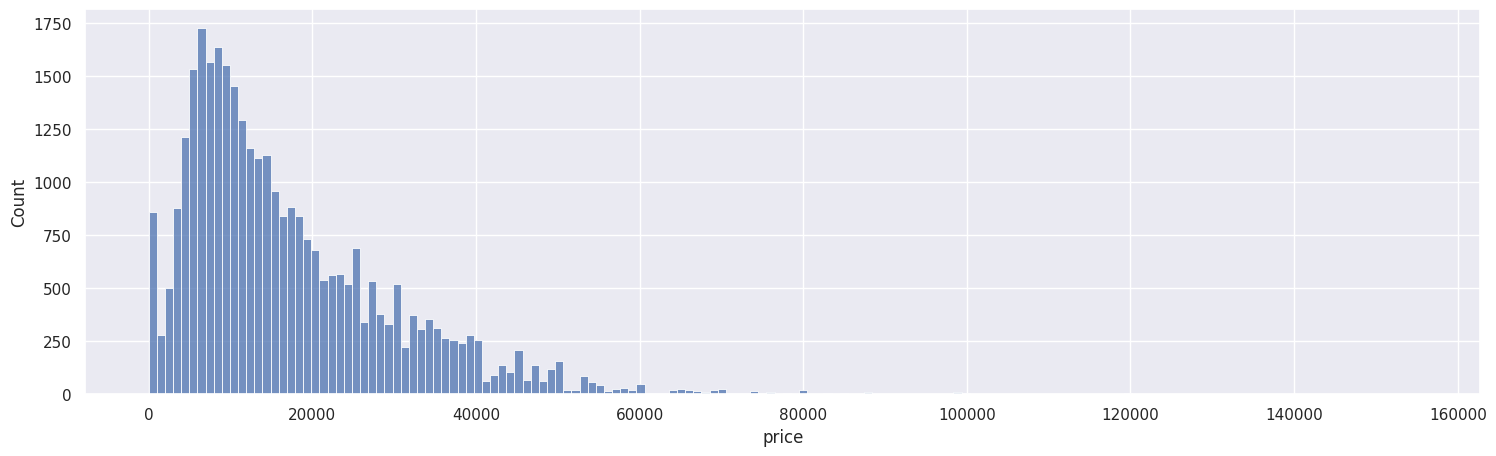

In [88]:
sns.histplot(data=df, x="price")

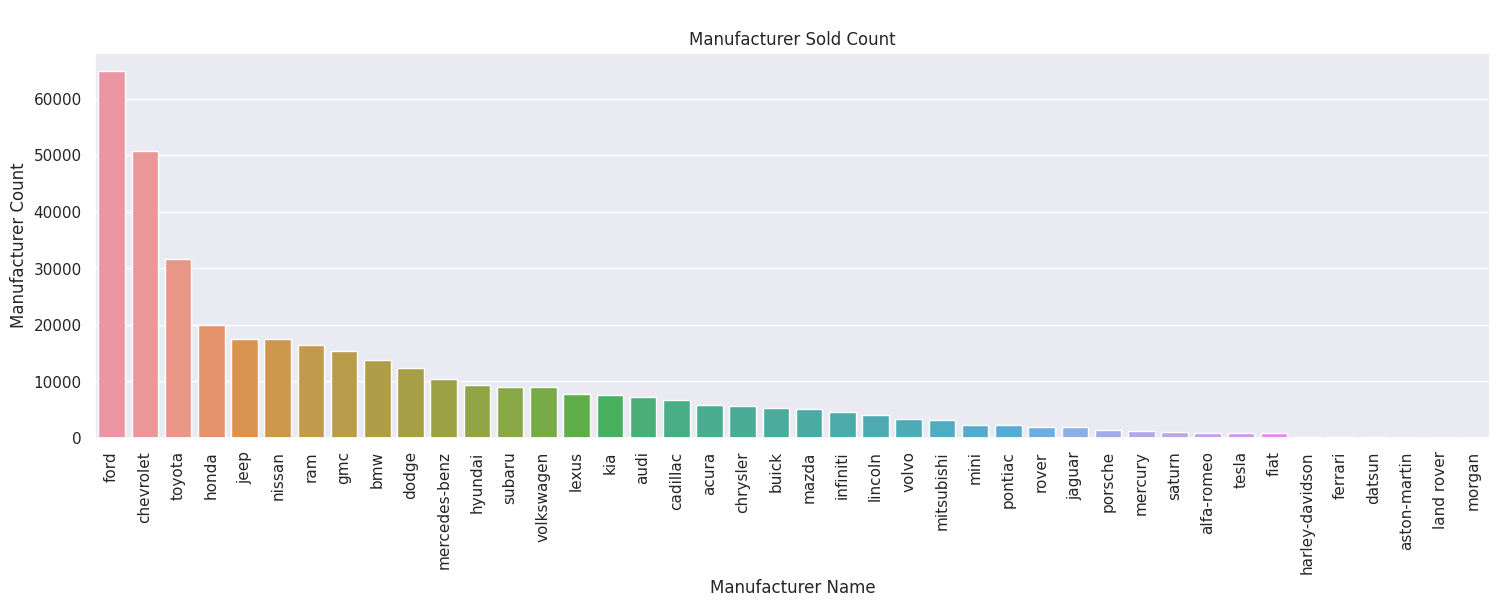

In [132]:
manufacturer_count = df.manufacturer.value_counts().reset_index().rename(columns={"index": "manufacturer", "manufacturer":"count"})

fig = sns.barplot(data=manufacturer_count, x="manufacturer", y="count");
fig.set_title("\nManufacturer Sold Count")
fig.set_ylabel("Manufacturer Count")
fig.set_xlabel("Manufacturer Name")
plt.xticks(rotation=90)

# for i in fig.patches:
#     fig.annotate(i.get_height(), 
#                  (i.get_x() + i.get_width() / 2., i.get_height()),
#                  ha = 'center', 
#                  # va = 'center', 
#                  xytext = (0, 1), 
#                  textcoords = 'offset points',
#                  rotation=90
#                 )
plt.show()

#### Finding out What is Most Sold/For Sale Car in Each State

In [27]:
# top car that was sold in each State was Ford

df.groupby(["state"])[["manufacturer"]].describe()

manufacturer                        
             count unique        top  freq
state                                     
ak            3362     37       ford   581
al            4448     37       ford   878
ar            3150     38  chevrolet   584
az            7859     39       ford  1272
ca           43484     41       ford  6334
co            9936     38       ford  1588
ct            4671     40       ford   655
dc            2567     38     toyota   289
de             845     34       ford   156
fl           26098     40       ford  4746
ga            6020     37       ford   930
hi            2627     38     toyota   481
ia            7616     38  chevrolet  1564
id            8056     38       ford  1483
il            9536     38       ford  1618
in            5262     37       ford   985
ks            5773     39  chevrolet  1050
ky            3913     37       ford   734
la            2611     38       ford   461
ma            7676     38       ford  1199
md            4139     39       ford   567
me            2627     38       ford   468
mi           15973     40       ford  3663
mn            7098     38       ford  1445
mo            3837     37  chevrolet   758
ms             914     33       ford   154
mt            5695     38       ford  1085
nc           12229     38       ford  1950
nd             351     27       ford   102
ne             935     35       ford   259
nh            2819     38       ford   417
nj            8940     39       ford  1192
nm            3657     39       ford   586
nv            2844     39       ford   375
ny           17116     39       ford  2386
oh           15987     40       ford  2899
ok            5412     39       ford   988
or           13919     39       ford  2744
pa           12334     42       ford  1906
ri            2052     37       ford   272
sc            5437     38       ford   837
sd            1182     36       ford   282
tn           10111     40       ford  1956
tx           20502     39       ford  4150
ut            1062     37       ford   233
va            8439     38       ford  1425
vt            2341     35       ford   364
wa           12156     40       ford  2117
wi           10698     39       ford  1822
wv             944     34       ford   220
wy             536     32       ford   124

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [153]:
# dropping all the NaNs

df.dropna(inplace=True)

In [154]:
# removing the outliers from the Price

df = df.query("100 < price <= 40000 ")

In [155]:
df.shape

(29959, 18)

In [ ]:
# Removing Space and Lower Casing everything 

df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [157]:
# Treating the Condition Column 

df["condition"] = df["condition"].str.replace("like new", "like_new")

In [156]:
# Converting the Year Column to Integer

df.year = df.year.astype("object")
df.year = df.year.astype("int")

#### Dropping `model`, `state`, `paint_color`, `id`, `VIN`, `region` 

In [158]:
df.drop(columns=["model", "state", "paint_color", "VIN", "id","region"], inplace=True)

In [159]:
# Treating Manufacturer Column

df.manufacturer = df.manufacturer.str.strip()
df.manufacturer = df.manufacturer.str.lower()

In [160]:
# Removing below Manufacturers as they caused error when fitting - Not sure why 

df.drop(df.query("manufacturer == 'tesla'").index, inplace=True)
df.drop(df.query("manufacturer == 'datsun'").index, inplace=True)
df.drop(df.query("manufacturer == 'aston-martin'").index, inplace=True)
df.drop(df.query("manufacturer == 'land rover'").index, inplace=True)

In [162]:
# Treating Title Status and dropping the problematic one that errored out during the fit

df.drop(df.query("title_status == 'parts only'").index, inplace=True)

In [164]:
# Dropping the Transmission with Category of "other" and Treating the rest

df.drop(df.query("transmission == 'other'").index, inplace=True)


In [166]:
# Converting the Cylinders to Integer 

df["cylinders"] = df["cylinders"].str.replace("cylinders", "")
df["cylinders"] = df["cylinders"].str.replace("other", "4")
df["cylinders"] = df["cylinders"].astype("int")

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [167]:
# Dividing the DF to X and y

y = df["price"]
X = df.drop(columns="price")

In [168]:
# Spliting the X and y to Train and Test 


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [169]:
# Grabing the Object Columns for OneHotEncoding
# Condition will be OrdinalEncoding, hence removing it from the list 

obj_cols = df.select_dtypes("object").columns.to_list()
obj_cols.remove('condition')
obj_cols

['manufacturer',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type']

#### Using ColumnTransformer, Pipe and GridSearchCV 

In [171]:
# Using RandomForestRegressor 

randome_state = [10, 100]

param_grid = {
    'rf__n_estimators': [10, 50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10]
}

col_transformer = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse_output=False), obj_cols),
    ("ord", OrdinalEncoder(), ['condition']),
    ("poly", PolynomialFeatures(degree=2, include_bias=False), ["odometer", "cylinders", "year"])
])


pipe = Pipeline([
    ("transformer", col_transformer),
    ("scaler", StandardScaler()),
    ("rf", RandomForestRegressor())
    ])


grid_rf = GridSearchCV(pipe, param_grid=param_grid, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)


In [175]:
# Using Ridge Regression 


alphas = np.linspace(0.1, 100, 50)

randome_state = [10, 100]

params = {"ridge__alpha": alphas, "ridge__random_state": randome_state}


col_transformer = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse_output=False), obj_cols),
    ("ord", OrdinalEncoder(), ['condition']),
    ("poly", PolynomialFeatures(degree=2, include_bias=False), ["odometer", "cylinders", "year"])
])


pipe = Pipeline([
    ("transformer", col_transformer),
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
    ])

grid_ridge = GridSearchCV(pipe, param_grid=params, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)


In [90]:
alphas = np.linspace(0.1, 100, 50)
params = {"verbose": [1]}

col_transformer = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse_output=False), obj_cols),
    ("ord", OrdinalEncoder(), ['condition']),
    ("poly", PolynomialFeatures(degree=3, include_bias=False), ["odometer", "cylinders"])
])


pipe = Pipeline([
    ("transformer", col_transformer),
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
    ])

grid_ridge = GridSearchCV(pipe, param_grid=params, cv=5, scoring="neg_mean_squared_error", error_score='raise')



### Fit with RandomForest

In [173]:
grid_rf.fit(X_train, y_train)
best_model_rf = grid_rf.best_estimator_
best_model_rf

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['condition']),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['odometer', 'cylinders',
                                                   'year'])])),
                ('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(max_depth=30, n_estimators=200))])

### Fit with Ridge

In [176]:
grid_ridge.fit(X_train, y_train)
best_model_ridge = grid_ridge.best_estimator_
best_model_ridge

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['condition']),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['odometer', 'cylinders',
                                                   'year'])])),
                ('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.1, random_state=10))])

In [177]:
# Predict with RandomForest
#--------------------------

train_preds_rf = best_model_rf.predict(X_train)
test_preds_rf = best_model_rf.predict(X_test)
mse_train_rf = mean_squared_error(y_train, train_preds_rf, squared=False)
mse_test_rf = mean_squared_error(y_test, test_preds_rf, squared=False)


# Predict with Ridge
#--------------------------

train_preds_ridge = best_model_ridge.predict(X_train)
test_preds_ridge = best_model_ridge.predict(X_test)
mse_train_ridge = mean_squared_error(y_train, train_preds_ridge, squared=False)
mse_test_ridge = mean_squared_error(y_test, test_preds_ridge, squared=False)

In [184]:
print("\n\n----------------- Train and Test MeanSquaredError For RandomForest -----------------")
print(f"Train MSE: {round(mse_train_rf, 2)}")
print(f"Test MSE : {round(mse_test_rf, 2)}")
print(f"Best Hyperparameters: {grid_rf.best_params_}\n\n")
print("~" * 100, "\n\n")
print("----------------- Train and Test MeanSquaredError For Ridge -----------------------")
print(f"Train MSE: {round(mse_train_ridge, 2)}")
print(f"Test MSE : {round(mse_test_ridge, 2)}")
print(f"Best Hyperparameters : {grid_ridge.best_params_}\n\n")



----------------- Train and Test MeanSquaredError For RandomForest -----------------
Train MSE: 1196.4
Test MSE : 3186.08
Best Hyperparameters: {'rf__max_depth': 30, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 


----------------- Train and Test MeanSquaredError For Ridge -----------------------
Train MSE: 4950.2
Test MSE : 5339.57
Best Hyperparameters : {'ridge__alpha': 0.1, 'ridge__random_state': 10}




In [186]:
ridge_train_score = round(best_model_ridge.score(X_train, y_train), 2)
ridge_test_score = round(best_model_ridge.score(X_test, y_test), 2)

rf_train_score = round(best_model_rf.score(X_train, y_train), 2)
rf_test_score = round(best_model_rf.score(X_test, y_test), 2)

print(f"\n\nRidge Train Score: {ridge_train_score}")
print(f"Ridge Test Score: {ridge_test_score}\n\n")

print(f"\nRandomForest Train Score: {rf_train_score}")
print(f"nRandomForest Test Score: {rf_test_score}\n\n")





Ridge Train Score: 0.74
Ridge Test Score: 0.69



RandomForest Train Score: 0.98
nRandomForest Test Score: 0.89




### Saving Both Models

In [187]:
# save the model to disk
filename_rf = 'used_car_price_prediction_rf_model.sav'
pickle.dump(best_model_rf, open(filename_rf, 'wb'))

filename_ridge = 'used_car_price_prediction_ridge_model.sav'
pickle.dump(best_model_ridge, open(filename_ridge, 'wb'))

## Predicting

#### Loading the Model 

In [188]:
loaded_rf_model = pickle.load(open(filename_rf, 'rb'))
loaded_ridge_model = pickle.load(open(filename_ridge, 'rb'))

In [189]:
cols = [
    "year",
    "manufacturer",
    "condition",
    "cylinders",
    "fuel",
    "odometer",
    "title_status",
    "transmission",
    "drive",
    "size",
    "type"
]

In [191]:

my_car = [2014, "fiat", "good", 4, "gas", 100000, "clean", "automatic", "fwd", "compact", "sedan"]


prediction_df = pd.DataFrame([my_car], columns=cols)


pred_with_rf = loaded_rf_model.predict(prediction_df)
pred_with_ridge = loaded_ridge_model.predict(prediction_df)

print()
print(f"The Estimated Price Of The Given Car With RandomForest Model Is: ${round(pred_with_rf[0], 2)}\n\n")
print(f"The Estimated Price Of The Given Car With Ridge Model Is: ${round(pred_with_ridge[0], 2)}\n\n")

print()


The Estimated Price Of The Given Car With RandomForest Model Is: $8721.45


The Estimated Price Of The Given Car With Ridge Model Is: $4529.42





### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

<h3><a href="http://anjiismail.com/grocery/predict-car-price/">Deployed Both Models</a></h3>